In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

e:\Downloads\Python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

In [3]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

df_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [4]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [ ]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.to_period('M')

In [7]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,527,36,8494,2655,6915,60,1544,773,1552,114
2023-02,447,24,6124,3060,4956,56,1258,878,1127,90
2023-03,438,19,6218,3183,4779,59,1114,829,1150,115
2023-04,565,40,6049,2801,4867,51,1025,781,991,112
2023-05,279,20,4993,2976,4377,49,839,746,914,90
2023-06,446,32,5683,2893,4645,48,1009,812,1033,93
2023-07,581,39,5201,2570,4876,65,883,747,1095,153
2023-08,903,39,6634,3269,6318,68,1186,903,1515,194
2023-09,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

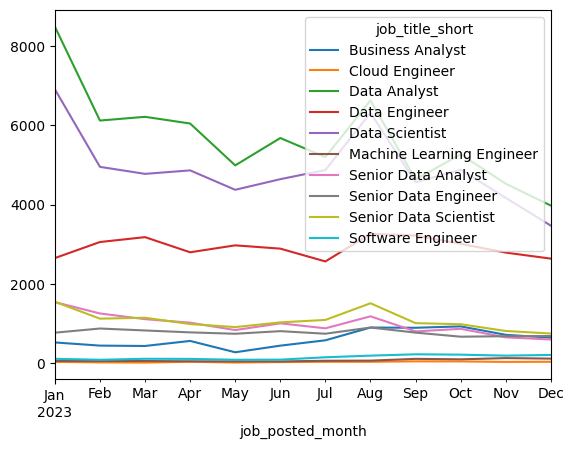

In [8]:
df_US_pivot.plot(kind='line')

In [10]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3


['Data Analyst', 'Data Scientist', 'Data Engineer']

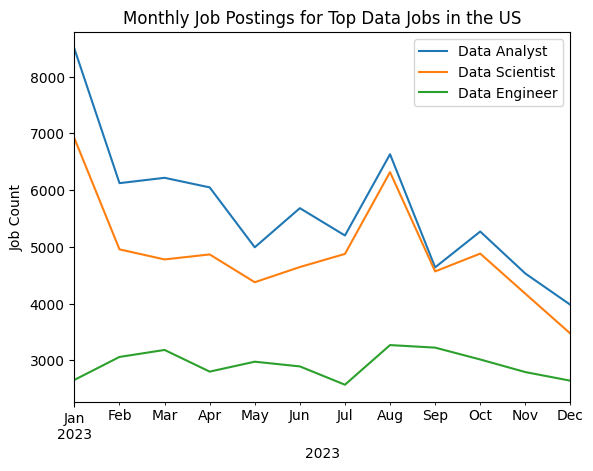

In [11]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

